In [1]:
import xml.etree.ElementTree as ET
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def parse_xml_to_dict(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    output_dict = {}

    for image_elem in root.findall('image'):
        image_name = image_elem.get('name')
        image_w, image_h = image_elem.get('width'), image_elem.get('height')
        labels = {}
        labels['size'] = (image_w, image_h)
        
        for polygon_elem in image_elem.findall('polygon'):
            label = polygon_elem.get('label')
            points = polygon_elem.get('points').split(';')
            points = [tuple(map(float, point.split(','))) for point in points]
            
            if label in labels.keys():
                labels[label].append(points)
            else:
                labels[label] = [points]

        output_dict[image_name] = labels

    return output_dict


In [2]:
def get_mask_list_from_dict(xml_dict, check_img_name=None):
    
    all_masks = []
    images = []
    
    for img_name in xml_dict.keys():
        
        if check_img_name is not None:
            if img_name != check_img_name:
                continue
                
        annot_traits = list(xml_dict[img_name].keys())

        if len(annot_traits) == 1:
            continue

        W = int(xml_dict[img_name]['size'][0])
        H = int(xml_dict[img_name]['size'][1])

        mask = np.zeros((H, W), dtype=np.uint8)

        # Define a list of points representing the polygon
        if 'Head' in xml_dict[img_name].keys():
            points_list = xml_dict[img_name]['Head']
            for points in points_list:
                polygon_points = np.array([points], dtype=np.int32)
                cv2.fillPoly(mask, polygon_points, 1)

        # Define a list of points representing the polygon
        if 'Eye' in xml_dict[img_name].keys():
            points_list = xml_dict[img_name]['Eye']
            for points in points_list:
                polygon_points = np.array([points], dtype=np.int32)
                cv2.fillPoly(mask, polygon_points, 2)

        # Define a list of points representing the polygon
        if 'Dorsal Fin' in xml_dict[img_name].keys():
            points_list = xml_dict[img_name]['Dorsal Fin']
            for points in points_list:
                polygon_points = np.array([points], dtype=np.int32)
                cv2.fillPoly(mask, polygon_points, 3)

        # Define a list of points representing the polygon
        if 'Pectoral Fin' in xml_dict[img_name].keys():
            points_list = xml_dict[img_name]['Pectoral Fin']
            for points in points_list:
                polygon_points = np.array([points], dtype=np.int32)
                cv2.fillPoly(mask, polygon_points, 4)

        # Define a list of points representing the polygon
        if 'Pelvic Fin' in xml_dict[img_name].keys():
            points_list = xml_dict[img_name]['Pelvic Fin']
            for points in points_list:
                polygon_points = np.array([points], dtype=np.int32)
                cv2.fillPoly(mask, polygon_points, 5)

        # Define a list of points representing the polygon
        if 'Anal Fin' in xml_dict[img_name].keys():
            points_list = xml_dict[img_name]['Anal Fin']
            for points in points_list:
                polygon_points = np.array([points], dtype=np.int32)
                cv2.fillPoly(mask, polygon_points, 6)

        # Define a list of points representing the polygon
        if 'Caudal Fin' in xml_dict[img_name].keys():
            points_list = xml_dict[img_name]['Caudal Fin']
            for points in points_list:
                polygon_points = np.array([points], dtype=np.int32)
                cv2.fillPoly(mask, polygon_points, 7)

        # Define a list of points representing the polygon
        if 'Adipose Fin' in xml_dict[img_name].keys():
            points_list = xml_dict[img_name]['Adipose Fin']
            for points in points_list:
                polygon_points = np.array([points], dtype=np.int32)
                cv2.fillPoly(mask, polygon_points, 8)

        all_masks.append(mask)
        images.append(img_name)

    return all_masks, images

In [3]:
def get_color_data_all(mask):
    colors = {}                            #   Name         Label
    #                                      # ----------------------
    colors[0] = np.array([0, 0, 0])        # Background      0
    colors[1] = np.array([254, 0, 0])      # Head            1
    colors[2] = np.array([0, 254, 0])      # Eye             2
    colors[3] = np.array([0, 0, 254])      # Dorsal Fin      3
    colors[4] = np.array([254, 254, 0])    # Pectoral Fin    4
    colors[5] = np.array([0, 254, 254])    # Pelvic Fin      5
    colors[6] = np.array([254, 0, 254])    # Anal Fin        6
    colors[7] = np.array([254, 254, 254])  # Caudal Fin      7
    colors[8] = np.array([0, 254, 102])    # Adipose Fin     8

    
    shape_0, shape_1 = mask.shape[0], mask.shape[1]
    color_data = np.zeros((shape_0, shape_1, 3))
    
    labels = np.unique(mask)
    
    for label in labels:
        z_r, z_c = np.where(mask == label)
        color_data[z_r, z_c] = colors[label]

    return color_data

In [4]:
xml_file = 'partial_annot.xml'
xml_dict = parse_xml_to_dict(xml_file)
masks, image_names = get_mask_list_from_dict(xml_dict)

In [5]:
# import shutil
# for img_name in image_names:
#     shutil.copy(os.path.join('/raid/maruf/bg-removed/inhs_task_2', img_name), 'images/'+img_name)

In [6]:
import os

def plot_img_mask(img_name, mask):

    image = Image.open(os.path.join('images/', img_name))

    fig, ax = plt.subplots(1, 3, figsize=(15, 4))

    ax[0].imshow(image)
    ax[0].axis('off')
    ax[0].set_title(f'image: {img_name}')

    ax[1].imshow(get_color_data_all(mask).astype(np.uint8))
    ax[1].axis('off')
    ax[1].set_title('Seg Mask')

    plt.imshow(
        Image.blend(
            image,
            Image.fromarray(
                get_color_data_all(mask).astype(np.uint8)
            ), 0.5
        )
    )
    ax[2].axis('off')
    ax[2].set_title('Blended')
    plt.show()
    

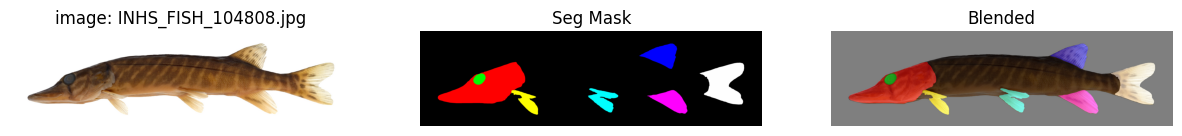

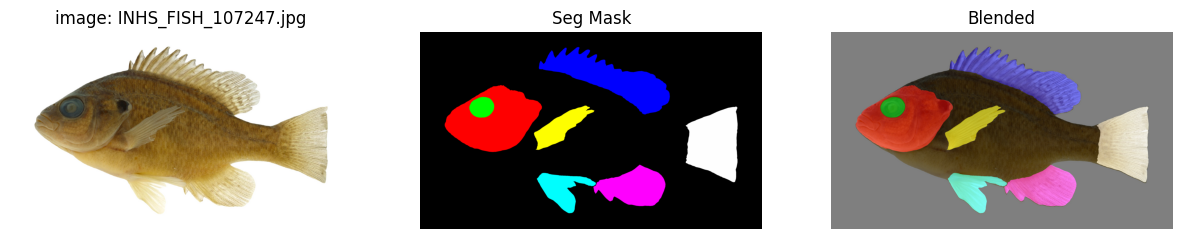

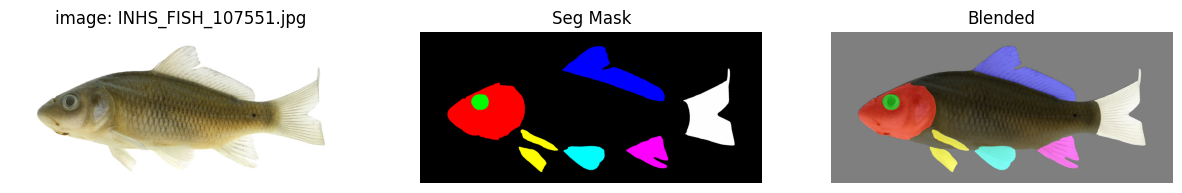

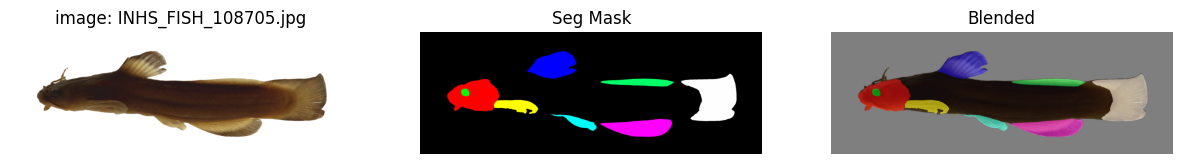

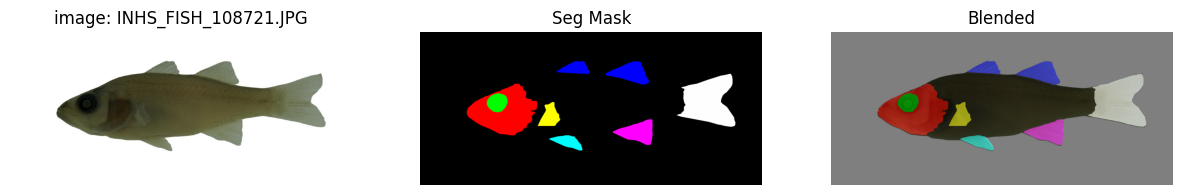

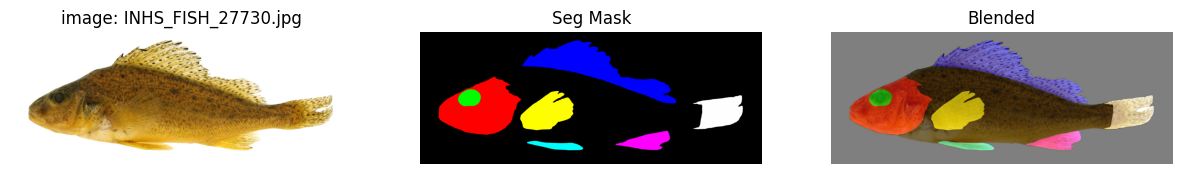

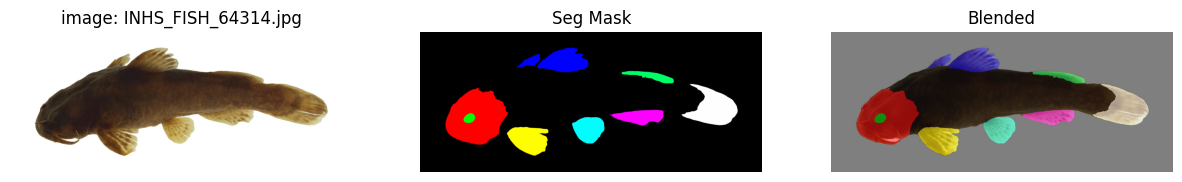

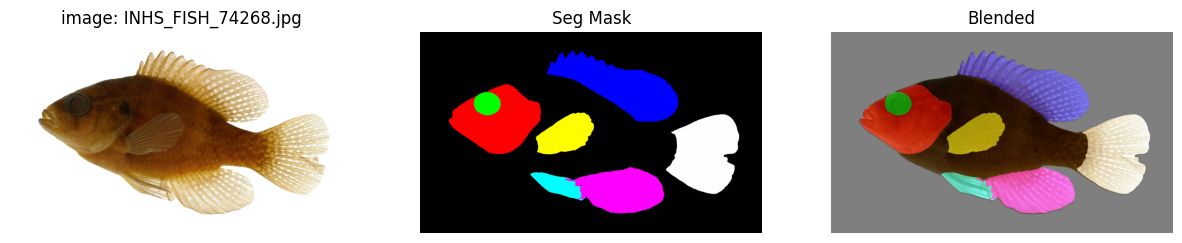

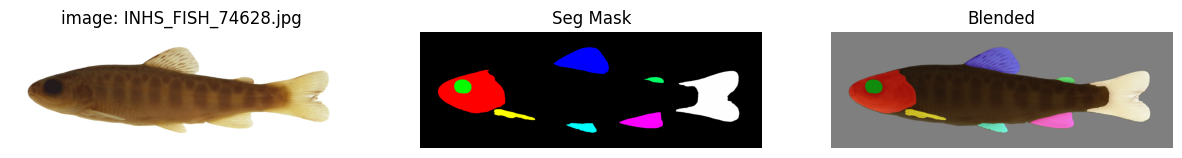

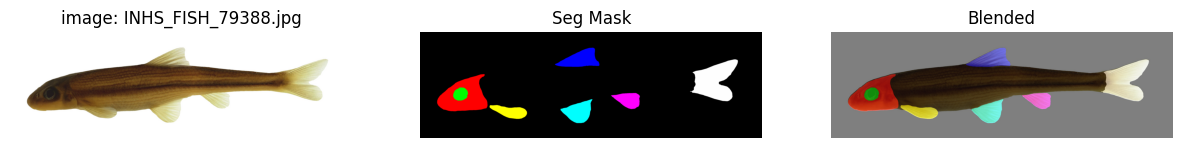

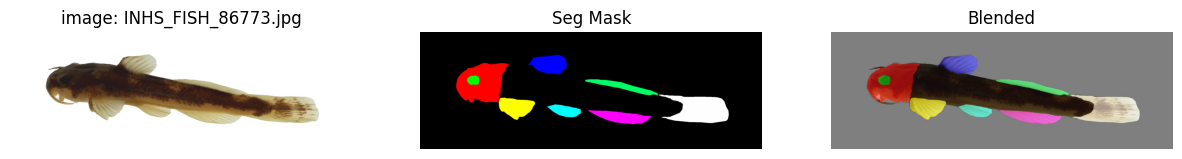

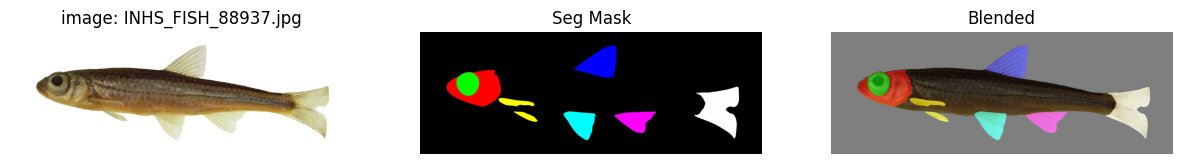

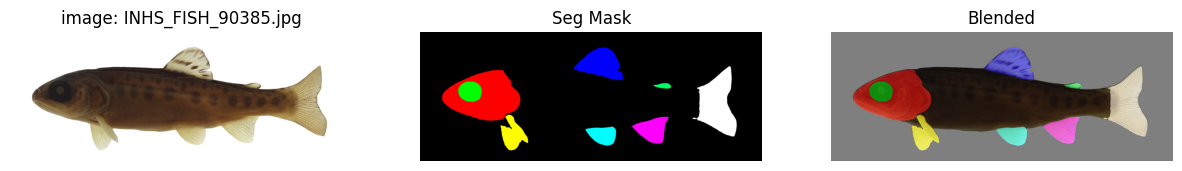

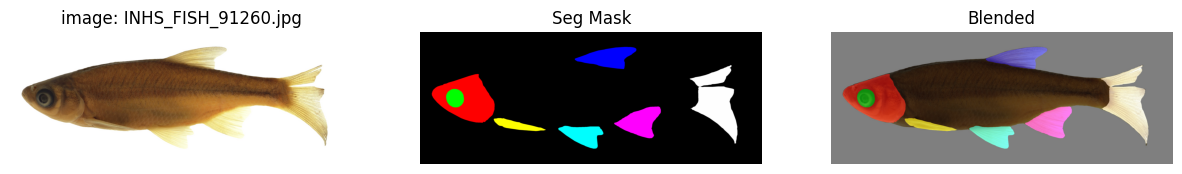

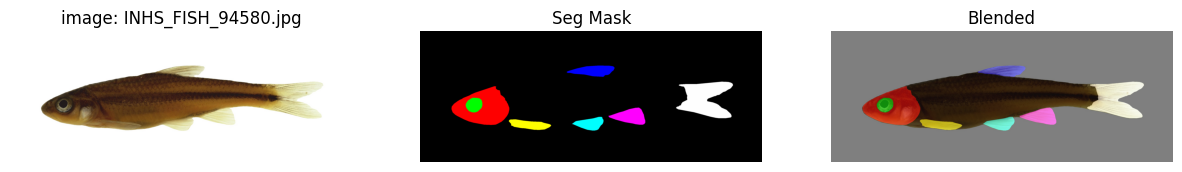

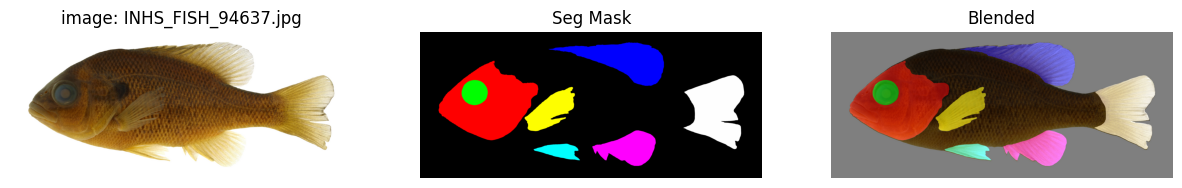

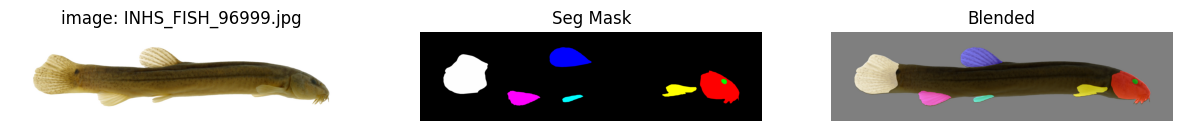

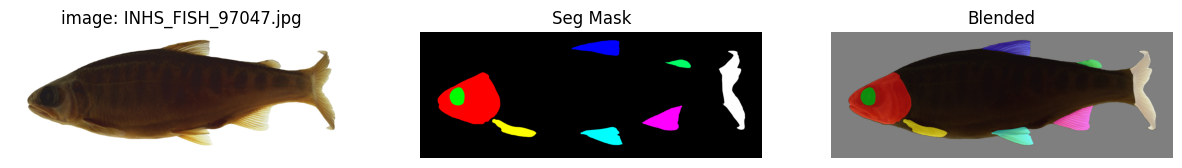

In [7]:
for idx in range(len(image_names)):
    mask, img_name = masks[idx], image_names[idx]
    plot_img_mask(img_name, mask)

## Save the masks

In [8]:
for idx in range(len(image_names)):
    mask, img_name = masks[idx], image_names[idx]
    np.save('seg_masks/'+img_name[:-4]+'.npy', mask)

## Metadata of the fish annotated

In [9]:
# import pandas as pd

# metadata_filename = '/raid/maruf/bg-removed/metadata/INHS.csv'
# df = pd.read_csv(metadata_filename)
# annotated_df = df[df.fileNameAsDelivered.isin(image_names)]
# annotated_df[['fileNameAsDelivered', 'scientificName', 'genus', 'family']].to_csv('metadata.csv', index=False)

In [10]:
import pandas as pd

metadata_filename = 'metadata.csv'
df = pd.read_csv(metadata_filename)

In [11]:
unique_sp = df.scientificName.unique()
unique_ge = df.genus.unique()
unique_fam = df.family.unique()

In [12]:
print('Unique Species: ', len(unique_sp))
print('Unique Genus: ', len(unique_ge))
print('Unique Family: ', len(unique_fam))

Unique Species:  18
Unique Genus:  12
Unique Family:  8
